In [1]:
from PIL import Image
import imagehash
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import hamming
from collections import deque
from pprint import pprint
import skimage
import cv2
%matplotlib inline

imgs = sorted(list(Path(r'C:\trashcam_images').glob('**/*.jpg')))

In [2]:
len(imgs)

161332

In [3]:
from time import time

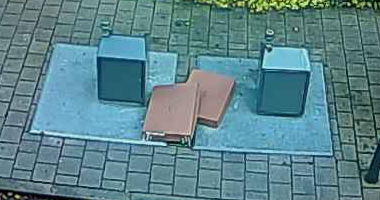

In [4]:
crop = (550,430,930,630)

def get_small_im(i):
    im = Image.open(imgs[i],'r')
    return im.crop(crop)
im = get_small_im(23556)
im

In [24]:
def try_codec(codec):
    writer = cv2.VideoWriter('trashcam_{}.avi'.format(codec), cv2.VideoWriter_fourcc(*codec), 100, (crop[2]-crop[0],crop[3]-crop[1]), True)
    t = time()
    for i in range(15000,17000):
        im = cv2.imread(str(imgs[i]))
        writer.write(im[crop[1]:crop[3],crop[0]:crop[2],:])
        if i % 100 == 0:
            print(i, time() - t, i/len(imgs)*100)
            t = time()
    cv2.destroyAllWindows()
    writer.release()

In [25]:
try_codec('mp4v')

15000 0.019021034240722656 9.297597500805791
15100 1.8058314323425293 9.359581484144497
15200 1.7663710117340088 9.421565467483202
15300 1.7509522438049316 9.483549450821908
15400 1.7606639862060547 9.545533434160614
15500 1.7762489318847656 9.607517417499318
15600 1.7768809795379639 9.669501400838024
15700 1.798717737197876 9.731485384176729
15800 1.7742555141448975 9.793469367515433
15900 1.7583887577056885 9.85545335085414
16000 1.7945961952209473 9.917437334192844
16100 1.7767183780670166 9.97942131753155
16200 1.778245449066162 10.041405300870256
16300 1.7988386154174805 10.10338928420896
16400 1.7895948886871338 10.165373267547666
16500 1.7815518379211426 10.22735725088637
16600 1.7995812892913818 10.289341234225075
16700 1.865232229232788 10.351325217563781
16800 1.787881851196289 10.413309200902487
16900 1.7916460037231445 10.475293184241192


In [26]:
try_codec('MJPG')

15000 0.013012170791625977 9.297597500805791
15100 1.3290464878082275 9.359581484144497
15200 1.4692673683166504 9.421565467483202
15300 1.3256733417510986 9.483549450821908
15400 1.3246302604675293 9.545533434160614
15500 1.336052656173706 9.607517417499318
15600 1.3405756950378418 9.669501400838024
15700 1.348541259765625 9.731485384176729
15800 1.3461086750030518 9.793469367515433
15900 1.3622446060180664 9.85545335085414
16000 1.3500185012817383 9.917437334192844
16100 1.3438940048217773 9.97942131753155
16200 1.362290620803833 10.041405300870256
16300 1.3392012119293213 10.10338928420896
16400 1.3469493389129639 10.165373267547666
16500 1.3446385860443115 10.22735725088637
16600 1.357525110244751 10.289341234225075
16700 1.354170322418213 10.351325217563781
16800 1.3546841144561768 10.413309200902487
16900 1.3759276866912842 10.475293184241192


In [27]:
codec = 'mp4v'
writer = cv2.VideoWriter('trashcam.avi'.format(codec), cv2.VideoWriter_fourcc(*codec), 100, (crop[2]-crop[0],crop[3]-crop[1]), True)
t = time()
for i in range(len(imgs)):
    im = cv2.imread(str(imgs[i]))
    writer.write(im[crop[1]:crop[3],crop[0]:crop[2],:])
    if i % 1000 == 0:
        print(i, time() - t, i/len(imgs)*100)
        t = time()
cv2.destroyAllWindows()
writer.release()

0 0.012093782424926758 0.0
1000 12.332499504089355 0.6198398333870527
2000 15.399127960205078 1.2396796667741055
3000 15.795851707458496 1.8595195001611584
4000 16.163876056671143 2.479359333548211
5000 15.866354942321777 3.099199166935264
6000 15.745856761932373 3.719039000322317
7000 15.896698236465454 4.338878833709369
8000 15.869198560714722 4.958718667096422
9000 15.859538793563843 5.578558500483475
10000 16.323100805282593 6.198398333870528
11000 15.912829637527466 6.81823816725758
12000 15.951772928237915 7.438078000644634
13000 15.862638473510742 8.057917834031686
14000 15.89446759223938 8.677757667418739
15000 17.085686445236206 9.297597500805791
16000 13.661272525787354 9.917437334192844
17000 13.658509016036987 10.537277167579898
18000 18.084543704986572 11.15711700096695
19000 17.94688844680786 11.776956834354003
20000 17.94596815109253 12.396796667741055
21000 17.990222930908203 13.01663650112811
22000 18.58983540534973 13.63647633451516
23000 17.871281147003174 14.2563161

In [5]:
writer = cv2.VideoWriter('trashcam_mp4v.avi', cv2.VideoWriter_fourcc(*'mp4v'), 100, (crop[2]-crop[0],crop[3]-crop[1]), True)
t = time()
for i in range(1000):
    im = cv2.imread(str(imgs[i]))
    writer.write(im[crop[1]:crop[3],crop[0]:crop[2],:])
    if i % 100 == 0:
        print(i, time() - t, i/len(imgs)*100)
        t = time()
cv2.destroyAllWindows()
writer.release()

0 0.013011693954467773 0.0
100 2.7701478004455566 0.06198398333870528
200 1.8223986625671387 0.12396796667741056
300 1.9028398990631104 0.18595195001611584
400 1.7315890789031982 0.24793593335482111
500 1.23002290725708 0.30991991669352636
600 1.229095697402954 0.37190390003223167
700 1.2287297248840332 0.433887883370937
800 1.2298393249511719 0.49587186670964223
900 1.2290310859680176 0.5578558500483475


In [10]:
writer = cv2.VideoWriter('trashcam_h264.avi', cv2.VideoWriter_fourcc(*'H264'), 100, (crop[2]-crop[0],crop[3]-crop[1]), True)
t = time()
for i in range(1000):
    im = cv2.imread(str(imgs[i]))
    writer.write(im[crop[1]:crop[3],crop[0]:crop[2],:])
    if i % 100 == 0:
        print(i, time() - t, i/len(imgs)*100)
        t = time()
cv2.destroyAllWindows()
writer.release()

0 0.011011600494384766 0.0
100 2.073038339614868 0.06198398333870528
200 2.041947603225708 0.12396796667741056
300 2.287179470062256 0.18595195001611584
400 2.2886881828308105 0.24793593335482111
500 2.4508426189422607 0.30991991669352636
600 2.316746473312378 0.37190390003223167
700 1.3953404426574707 0.433887883370937
800 1.1413342952728271 0.49587186670964223
900 1.1379234790802002 0.5578558500483475


In [11]:
writer = cv2.VideoWriter('trashcam_x264.avi', cv2.VideoWriter_fourcc(*'X264'), 100, (crop[2]-crop[0],crop[3]-crop[1]), True)
t = time()
for i in range(1000):
    im = cv2.imread(str(imgs[i]))
    writer.write(im[crop[1]:crop[3],crop[0]:crop[2],:])
    if i % 100 == 0:
        print(i, time() - t, i/len(imgs)*100)
        t = time()
cv2.destroyAllWindows()
writer.release()

0 0.012011289596557617 0.0
100 2.4001688957214355 0.06198398333870528
200 2.3232131004333496 0.12396796667741056
300 2.2381412982940674 0.18595195001611584
400 1.1613311767578125 0.24793593335482111
500 1.1354994773864746 0.30991991669352636
600 1.1281788349151611 0.37190390003223167
700 1.127303123474121 0.433887883370937
800 1.1305837631225586 0.49587186670964223
900 1.1262307167053223 0.5578558500483475


In [4]:
cap = cv2.VideoCapture(video_name) #video_name is the video being called
cap.set(1,frame_no); # Where frame_no is the frame you want
ret, frame = cap.read() # Read the frame
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

NameError: name 'video_name' is not defined